# **level 3** : notebook

## $ task 1 $ : $ predictive$   $ modelling $
- here we will Build  tree models to predict the
aggregate rating of a restaurant based on
available features.
- Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.
- and compare diffrent tree models based on their performance.


### **Load** the engineered dataset from level 2

In [7]:
import pandas as pd

df = pd.read_csv("final_level3_dataset.csv")  #  cleaned + engineered dataset
df.head(3)


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,name_length,address_length
0,162,73,171,121.027535,14.565443,920,1100,1,0,3,4.8,314,16,71
1,162,73,593,121.014101,14.553708,1111,1200,1,0,3,4.5,591,16,67
2,162,75,308,121.056831,14.581404,1671,4000,1,0,4,4.4,270,22,56


### Select **features + target**

In [2]:

# Aggregate rating is our target 

X = df.drop(['Aggregate rating'], axis=1)
y = df['Aggregate rating']


### *Train–Test* Split

In [3]:
from sklearn.model_selection import train_test_split

# 80%-training set, 20%- test set splitting chriterion

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### **Modeling Approach A:** descsion tree Regressor

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train) 


DecisionTreeRegressor(random_state=42)

### **Modeling Approach B:** Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150, random_state=42)

### Pre-Tuning **Model Evaluation**
we use MAE, MSE, and R² metrics to evaluate performance of both models

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# lets use a helper function which saves time, it takes trained model object , and  test sets as arguments ⚡️

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)  #  trained model predicting on test sets
    mae = mean_absolute_error(y_test, preds)  # metrics results from test sets 
    mse = mean_squared_error(y_test, preds)
    r2  = r2_score(y_test, preds)
    return mae, mse, r2            # returns those metric results in form of tuple(mae,mse,r2) 

dt_results = evaluate(dt_model, X_test, y_test) 
rf_results = evaluate(rf_model, X_test, y_test)

print("Decision Tree Results:")
print(f"MAE: {dt_results[0]:.4f}")  # accessing the mae result in tuple which is 0 index - mae
print(f"MSE: {dt_results[1]:.4f}")  # accesesing the mse result in tuple : 1 index -mse
print(f"R2 : {dt_results[2]:.4f}")  # accesesing the r2 result in tuple : 2 index - r2

print("\nRandom Forest Results:")
print(f"MAE: {rf_results[0]:.4f}")
print(f"MSE: {rf_results[1]:.4f}")
print(f"R2 : {rf_results[2]:.4f}")


Decision Tree Results:
MAE: 0.2617
MSE: 0.1639
R2 : 0.9280

Random Forest Results:
MAE: 0.1908
MSE: 0.0855
R2 : 0.9624


**interpretation**

note that these are the pre tuning results.and random forest gives much better performance across every metric.
- Lower MAE - predictions are closer to the true values.
- Lower MSE - fewer large errors.
- Higher R² -  explains 96% of rating variance.

The Decision Tree performs well  but without using appropiate hyperparameters can easily prone of overfitting.becuase A Decision Tree with default parameters tends to fit the training data perfectly because defualty
max_depth = None,
min_samples_split = 2,
min_samples_leaf = 1,
This makes the tree grow very deep snice we didnt put any restriction on tree depth therby it tends to grow deeply until min sample split becomes 2 and min samples leaf 1,this results capturing more noise in the training data and memorises training data. as a results it performs well on traing data but worst on unseen data. 

to check wheather our descion tree overfit or not we will compare its training results and test results , if training are greater than test means its overfiting 



In [7]:
# Predictions on train & test sets
train_pred = dt_model.predict(X_train)
test_pred  = dt_model.predict(X_test)

# Evaluation on train data
train_r2  = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_mse = mean_squared_error(y_train, train_pred)

# Evaluation on test data
test_r2  = r2_score(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("=== Decision Tree Performance Comparison ===")
print(f"Train R²: {train_r2:.4f}")
print(f"Test  R²: {test_r2:.4f}\n")

print(f"Train MAE: {train_mae:.4f}")
print(f"Test  MAE: {test_mae:.4f}\n")

print(f"Train MSE: {train_mse:.4f}")
print(f"Test  MSE: {test_mse:.4f}")

=== Decision Tree Performance Comparison ===
Train R²: 1.0000
Test  R²: 0.9280

Train MAE: 0.0000
Test  MAE: 0.2617

Train MSE: 0.0000
Test  MSE: 0.1639


**Train Results**
- R² = 1.0000(perfect=overfit)
- MAE = 0.0000
- MSE = 0.0000

 we can see The model fits the training data perfectly as it has zero error and perfect R².
It literally predicts every training sample with zero error — something that only happens when the tree memorizes the data.

#### **conclusion**
The Decision Tree model achieved perfect performance on the training set (R² = 1.0, zero error), indicating that it memorized the training samples. However, test accuracy dropped (R² = 0.928),There is a clear drop in performance from train to test.
 showing that the model does not generalize perfectly. This confirms ***overfitting***, which is expected in  deep, unrestricted single decision tree snince we havent tuned. Random Forest overcomes this issue by combining multiple trees, which reduces chances of overfitting therby good generalization and provides better test performance.  even tho random forest performs better on test set  without tuning but using deafult parameters not always optimal so its better to tune.tuning will likely improve Random Forest even more.
#### **next steps**
 
 lets tune our descion tree to reduce overfit and compare once again with random forest but this time we also tune random forest. and compare both tuned models based on selected metric.

 

#### **Selected Metric: R squared **
The primary metric used for model comparison and hyperparameter tuning(refit=)

- R² measures how much of the variance in ratings your model explains.
- Higher R² = better model.





### **hyperparameter tuning** 🔥

In [8]:
# tuning random forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None]
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',     # R-squared score
    refit='r2')  # best model chosen based on highest R2



grid.fit(X_train, y_train)

print("Best R2 score:", grid.best_score_)

Best R2 score: 0.9596480705451821


In [14]:
# save the best model to test on test set
rf_best_model = grid.best_estimator_ 



In [10]:
# tuning descision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30],           
    'min_samples_split': [2, 5, 10, 20],             
    'min_samples_leaf': [1, 2, 4, 8],                 
    'max_features': [None]            
}

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='r2',     # chooses best model based on highest r square
    refit='r2')


dt_grid.fit(X_train, y_train)
print("Best R2 score:", dt_grid.best_score_)

Best R2 score: 0.9507707375472163


In [20]:
# save the best model to test on test set
dt_best_model = dt_grid.best_estimator_ 



### Post-Tuning **Model Evaluation**

In [21]:
# now perform tuned best models on testset 
# use the same helper function we used in pre tuning model evaluation

tuned_dt_results = evaluate(dt_best_model, X_test, y_test)
tuned_rf_results = evaluate(rf_best_model, X_test, y_test)

print(tuned_dt_results) # note that : our function returns those metric results in form of tuple(mae,mse,r2) 
print(tuned_rf_results)


print("\ntuned Decision Tree Results:")
print(f"MAE: {tuned_dt_results[0]:.4f}") # 0 index means -mae
print(f"MSE: {tuned_dt_results[1]:.4f}") # 1 index - mse
print(f"R2 : {tuned_dt_results[2]:.4f}") # 2 index - r2

print("\ntuned Random Forest Results:")
print(f"MAE: {tuned_rf_results[0]:.4f}")
print(f"MSE: {tuned_rf_results[1]:.4f}")
print(f"R2 : {tuned_rf_results[2]:.4f}")



(0.21278299176678422, 0.10596463307891042, 0.9534448334723626)
(0.19032993804604223, 0.08474738260571085, 0.9627665533739719)

tuned Decision Tree Results:
MAE: 0.2128
MSE: 0.1060
R2 : 0.9534

tuned Random Forest Results:
MAE: 0.1903
MSE: 0.0847
R2 : 0.9628


#### **model daignosis**
After hyperparameter tuning, both the Decision Tree and the Random Forest models show noticeable improvements in performance.

Decision Tree:
- MAE and MSE decreased compared to the untuned model,
- R² improved from 0.9280 → 0.9534, showing the model now explains more variance in ratings.

Random Forest:
- Performance improved slightly after tuning.
- R² increased from 0.9624 → 0.9628, and both MAE and MSE reduced marginally.

Even small improvements are meaningful because the model was already performing very well.
Overall, tuning helped both models become more stable and accurate, with Random Forest maintaining the strongest performance.

#### **conclusion**
The Random Forest Regressor performs the best among the models tested.
It achieves the highest R² score (0.9628), meaning it can explain about 96% of the variation in restaurant ratings.
It also produces lower prediction errors (MAE & MSE) compared to the Decision Tree.
In contrast, the Decision Tree, although improved after tuning, explains around 95% of the variance (R² = 0.9534) and has slightly higher errors.Therefore, the Random Forest is the most reliable and accurate model for predicting restaurant ratings in this dataset.

## Task 2: ***Customer Preference Analysis***

$ here$ $ we $ $ will$ $ :$
- Analyze the relationship between the type of
cuisine and the restaurant's rating.
- Identify the most popular cuisines among
customers based on the number of votes.
- Determine if there are any specific cuisines
that tend to receive higher ratings.

**⚠️ snice this is analysis task again we have to reload the orginal dataset.** becuase in level 2 we encoded some columns so if we reload this engeneered  dataset for this analysing we see numbers i.e if we try to analyise cuisnes. in output it showes encoded codes. which were not suitabale for interpreting.

In [75]:
import pandas as pd

# loading orginal dataset

df_orginal = pd.read_csv("Dataset .csv")  #  cleaned + engineered dataset
df_orginal.head(3)



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [76]:
# as we knew from our level 1 that cuisnes have 9 missing values lets fill them, so our analysis be good

df_orginal['Cuisines'] = df_orginal['Cuisines'].fillna('Unknown')



In [77]:
print(df_orginal['Cuisines'].isnull().sum())

0


lets Analyze the relationship between the type of cuisine and the restaurant's rating.but wait Your Cuisines column contains multiple cuisines in one row - means restuarents have multiple cuisines.If you do NOT split:
You treat "North Indian, Chinese" as one cuisine type, not two.
So you CANNOT know:
- How North Indian performs
-  How Chinese performs
-  Which one is more popular
-  Whether Chinese gets more votes
- Which cuisine gets higher ratings

we will fail the task because we were analyzing cuisine combinations, not individuall cuisines.

When you SPLIT the cuisines:

| Restaurant | Cuisine      | Rating |
| ---------- | ------------ | ------ |
| A          | North Indian | 4.5    |
| A          | Chinese      | 4.5    |


NOW you can perform Task 2:
-  Find avg rating for each cuisine
Example: Chinese avg rating = 4.0, Italian = 4.3, etc.
-  Find most popular cuisines by votes
Example: Chinese gets 12k votes, Italian gets 8k votes.
- Find highest-rated cuisines



In [78]:
# To properly analyze cuisines, we must split them so every cuisine is counted individually.
# This is a standard feature engineering step for multi-label categorical variables.

# Split cuisines into separate rows
df_expanded = (
    df_orginal
      .assign(Cuisine = df_orginal['Cuisines'].str.split(','))
      .explode('Cuisine')
)

# Remove leading/trailing spaces 
df_expanded['Cuisine'] = df_expanded['Cuisine'].str.strip()

print(df_expanded['Cuisine'].unique()) # lets see all individual cuisines

df_expanded[['Cuisine']] # u can see each cuisine has a seperate row- ready for our analysis. 




['French' 'Japanese' 'Desserts' 'Seafood' 'Asian' 'Filipino' 'Indian'
 'Sushi' 'Korean' 'Chinese' 'European' 'Mexican' 'American' 'Ice Cream'
 'Cafe' 'Italian' 'Pizza' 'Bakery' 'Mediterranean' 'Fast Food' 'Brazilian'
 'Arabian' 'Bar Food' 'Grill' 'International' 'Peruvian' 'Latin American'
 'Burger' 'Juices' 'Healthy Food' 'Beverages' 'Lebanese' 'Sandwich'
 'Steak' 'BBQ' 'Gourmet Fast Food' 'Mineira' 'North Eastern' 'Unknown'
 'Coffee and Tea' 'Vegetarian' 'Tapas' 'Breakfast' 'Diner' 'Southern'
 'Southwestern' 'Spanish' 'Argentine' 'Caribbean' 'German' 'Vietnamese'
 'Thai' 'Modern Australian' 'Teriyaki' 'Cajun' 'Canadian' 'Tex-Mex'
 'Middle Eastern' 'Greek' 'Bubble Tea' 'Tea' 'Australian' 'Fusion' 'Cuban'
 'Hawaiian' 'Salad' 'Irish' 'New American' 'Soul Food' 'Turkish'
 'Pub Food' 'Persian' 'Continental' 'Singaporean' 'Malay' 'Cantonese'
 'Dim Sum' 'Western' 'Finger Food' 'British' 'Deli' 'Indonesian'
 'North Indian' 'Mughlai' 'Biryani' 'South Indian' 'Pakistani' 'Afghani'
 'Hyderabadi

,Cuisine
0,French
0,Japanese
0,Desserts
1,Japanese
2,Seafood
...,...
9547,Cafe
9548,Italian
9548,World Cuisine
9549,Restaurant Cafe


In [79]:
df_expanded.head(3)

# u can see two columns "cuisines"- combination of cuisnes (orginal column), another is "cuisine" - our  (analysis column) ✅

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Desserts


### **1.Top Cuisines by Popularity (Votes)**

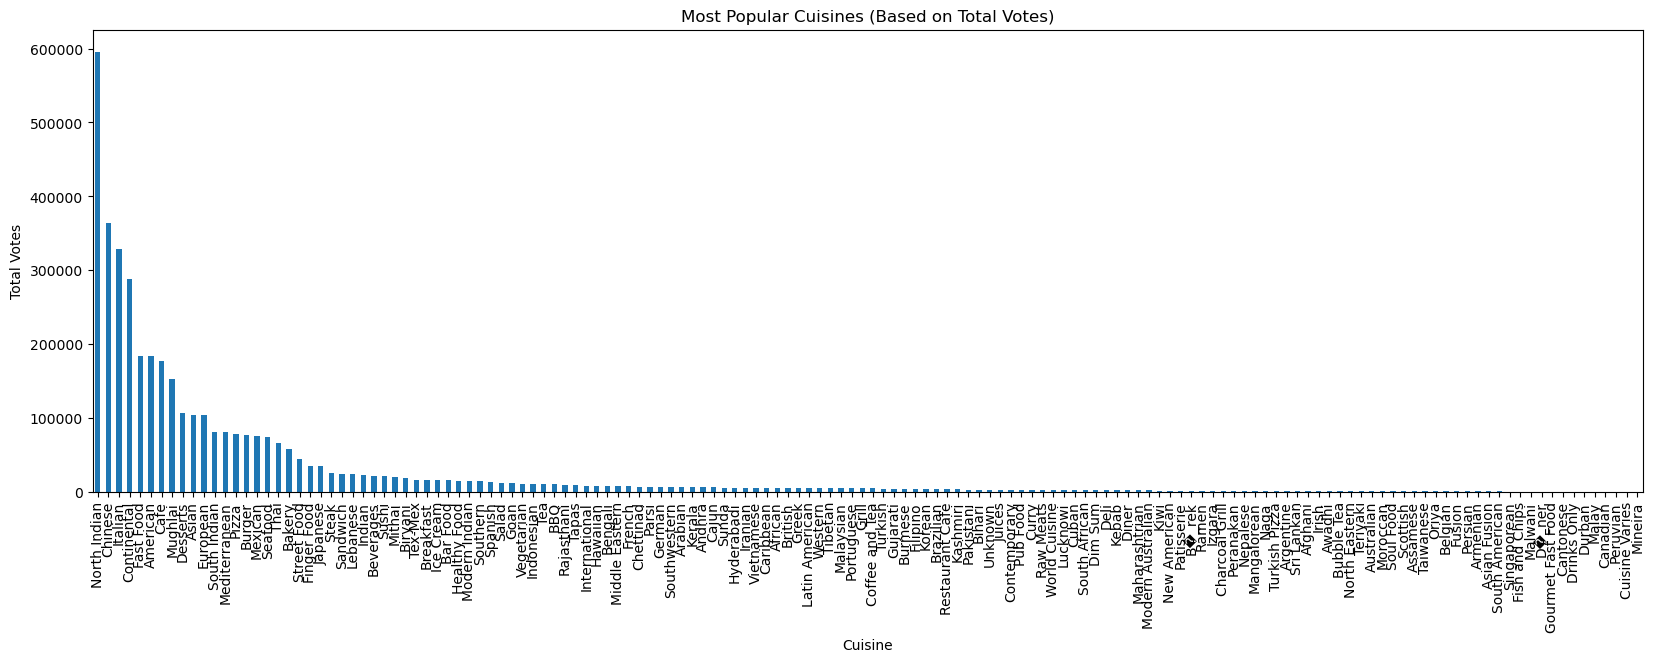

In [80]:
import matplotlib.pyplot as plt

# dont forget to use analysis column-"cuisin".not orginal  column -"cuisines"

popularity = df_expanded.groupby("Cuisine")["Votes"].sum().sort_values(ascending=False) # highest to lowest
popularity.plot(kind="bar", figsize=(20,6))
plt.title("Most Popular Cuisines (Based on Total Votes)")
plt.xlabel("Cuisine")
plt.ylabel("Total Votes")
plt.show()


### **Display Top Cuisines by Total Votes (as DataFrame)**

In [81]:

popularity_df = (
    df_expanded.groupby("Cuisine")["Votes"]
    .sum()
    .sort_values(ascending=False) # highest to lowest
    .reset_index()
)

popularity_df.head(10) # above visula is too messy lets see in dataframe but only top 10


,Cuisine,Votes
0,North Indian,595981
1,Chinese,364351
2,Italian,329265
3,Continental,288255
4,Fast Food,184058
5,American,183117
6,Cafe,177568
7,Mughlai,151946
8,Desserts,105889
9,Asian,104303


### **2.Average Rating for Each Cuisine**

In [82]:
avg_rating_df = (
    df_expanded.groupby("Cuisine")["Aggregate rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_rating_df.head(10)   # top 10 for clarity


,Cuisine,Aggregate rating
0,Sunda,4.900000
1,B�_rek,4.700000
2,Taiwanese,4.650000
3,Ramen,4.500000
4,Dim Sum,4.466667
5,Hawaiian,4.412500
6,D�_ner,4.400000
7,Bubble Tea,4.400000
8,Curry,4.400000
9,Kebab,4.380000


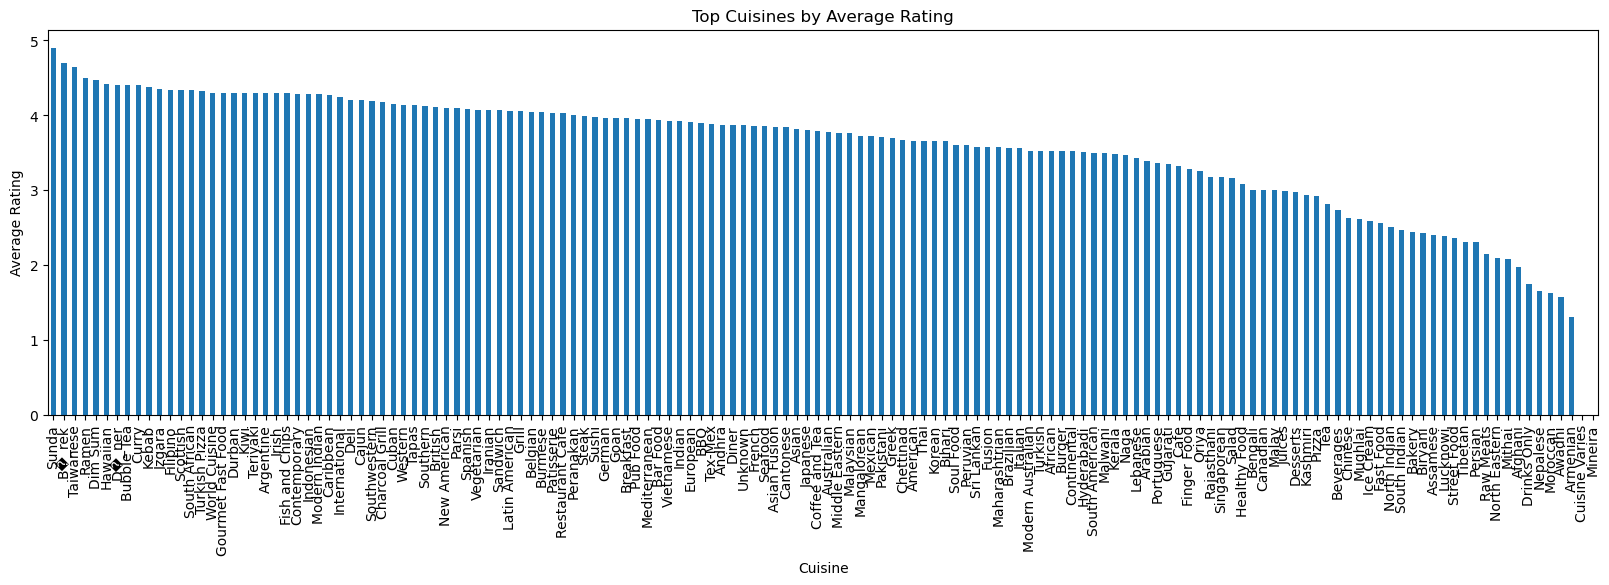

In [83]:

# lets see in visuval 

avg_rating = df_expanded.groupby("Cuisine")["Aggregate rating"].mean().sort_values(ascending=False) 



avg_rating.plot(kind="bar", figsize=(20,5))
plt.title("Top Cuisines by Average Rating")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.show()


### **3.Analyze the relationship between the type of cuisine and the restaurant's rating.**

the purpose of this is to visually understand how ratings vary across different cuisines.A bar chart only shows average ratings, but a boxplot reveals full rating distribution: like median,min-max,spread(IQR),outliers(extreme low/high ratings).

**mainly based on IQR we can see Is the cuisine consistently good or inconsistent?**

To identify which cuisines are consistently high-quality vs inconsistent.
-  Some cuisines may have high average rating but wide spread :  means customer experience varies.
-  Some cuisines may have tight rating range(spread) around high values :  means quality is consistently high.

**Because average rating alone can mislead you.**
Suppose:
- Italian average rating = 4.3
- Chinese average rating = 4.2
If you look only at averages → they look similar.
But boxplot might show:
- Italian ratings spread between 4.2–4.5 → consistently high.
- Chinese ratings spread between 2.5–4.7 → very inconsistent.

 Same average, totally different customer experience pattern.

**What we Can Conclude from the Boxplot**

- Which cuisines deliver consistent quality: if
High median & small spread → strong & reliable.
- Which cuisines are risky/inconsistent : if
Large spread → depends on restaurant quality.


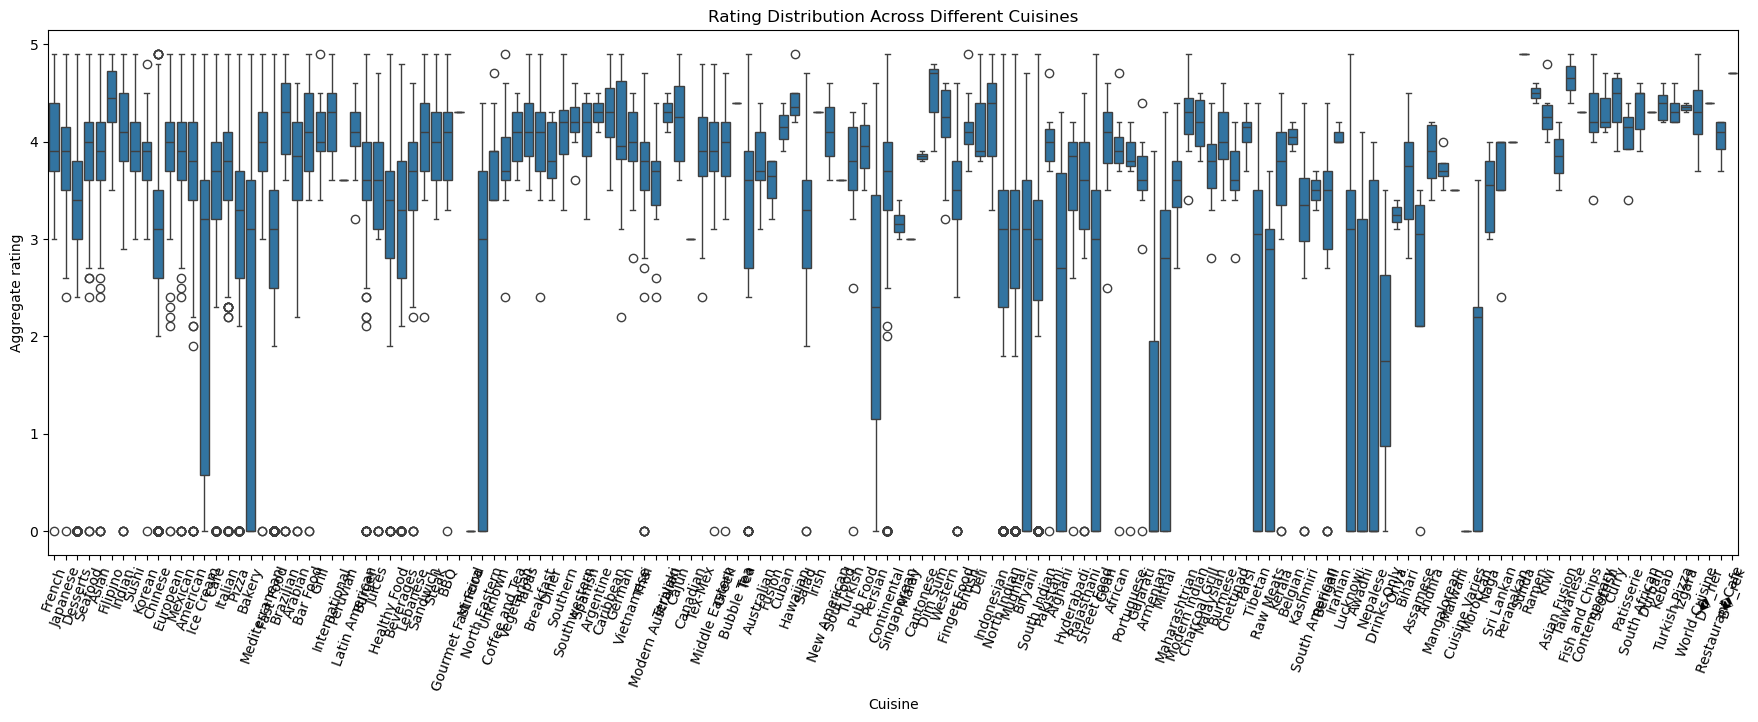

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(18,6))
sns.boxplot(data=df_expanded, x="Cuisine", y="Aggregate rating")
plt.tight_layout()
plt.xticks(rotation=70)
plt.title("Rating Distribution Across Different Cuisines")
plt.show()


## **Final Conclusion:** Customer Preference Analysis
- *The analysis reveals a clear gap between what customers frequently choose and what they rate highest.
North Indian, Chinese, and Italian cuisines dominate in total votes, showing they are the most widely tried and popular choices.*
- *However, the highest average ratings belong to cuisines like Sunda, Taiwanese, Ramen, Bubble Tea, and Dim Sum, which indicates that top-rated cuisines are not necessarily the most popular ones.*


#### **Key Insight**

*Popularity reflects exposure, not satisfaction.*
- Cuisines with the highest votes aren’t always the ones customers rate the best.

*Quality Consistency (Boxplot Takeaway)*
- *Some cuisines have high median with tight rating spread → quality is consistently good (reliable experience).*
- *Others have wide variability → customer experience varies greatly depending on where they eat it.*

1. Consistently high-quality cuisines:
E.g., Sunda, Ramen, Dim Sum (high median + small IQR)

2. Inconsistent experience cuisines:
E.g., Chinese, Fast Food (large spread despite popularity)




## **Task 3 : Data Visualization**
- Create visualizations to represent the distribution
of ratings 
- Compare the average ratings of different cities using appropriate visualizations.
- Visualize the relationship between votes and ratings.

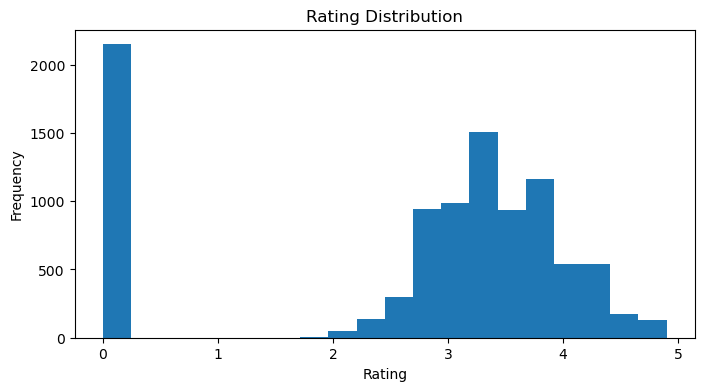

In [85]:
plt.figure(figsize=(8,4))
plt.hist(df_orginal['Aggregate rating'], bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


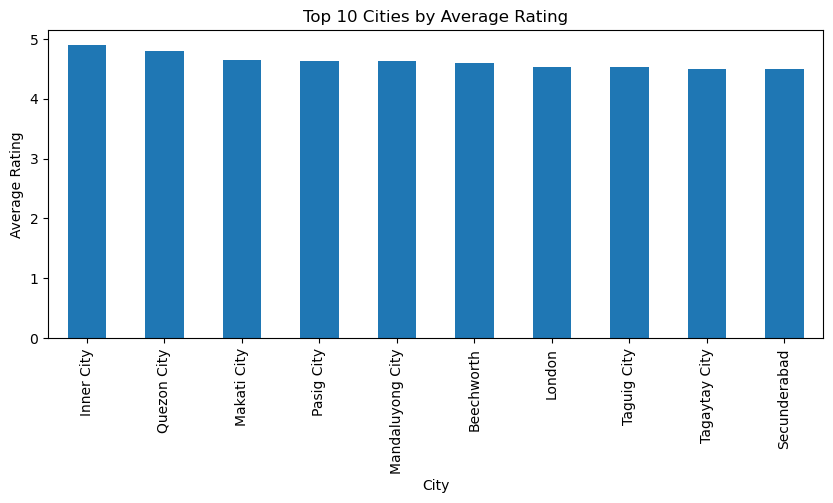

In [86]:
# ********* Average Rating by City (Bar Plot) ************

avg_city = df_orginal.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)# used top 10 for clarity

plt.figure(figsize=(10,4))
avg_city.plot(kind="bar")
plt.title("Top 10 Cities by Average Rating")
plt.ylabel("Average Rating")
plt.show()



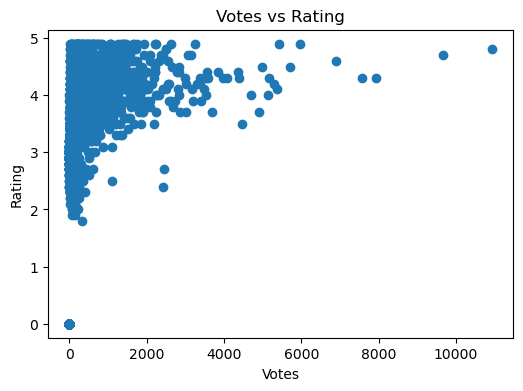

In [87]:
# *********** Votes vs Rating (Scatter Plot) ***********

plt.figure(figsize=(6,4))
plt.scatter(df_orginal['Votes'], df_orginal['Aggregate rating'])
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()


**Aim of the Plot**

To visualize how customer engagement (votes) relates to restaurant rating —
specifically, to see whether restaurants with more votes also tend to have higher ratings, or if high ratings occur even with very few votes.

**insight**

Even though many restaurants have very high ratings (4.0–5.0), only a small fraction of them receive large vote counts.
This means:
 - High rating does not always mean high popularity :
Most restaurants are rated well but haven’t been rated by many people.
- Restaurants with thousands of votes tend to have ratings above 4, showing strong public trust and consistent customer satisfaction.

#                          **End of Level 3 Notebook** 
